# Machine Learning - Clase 2

Fecha: **27/11/2023**

Autor: **Ing. CIP Francisco Cerna**

Objetivo:

Aplicar los modelos de Machine Learning de Aprendizaje Supervisado para clasificación e interpretar los resultados de cada uno de los modelos.

Fuentes:

1. [Clasificación binaria.](https://www.kaggle.com/code/sa7vik/linear-regression-practice-model)
2. [Clasificación de múltiples clases.](https://www.kaggle.com/code/huseyinbaytar/medical-cost-prediction)
3. [Práctica](https://www.kaggle.com/code/sadiqshah/bike-store-sales-in-europe/notebook)

In [1]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

In [2]:
#Loading the Iris dataset
data = load_iris()
X, y = data.data, data.target

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Creating an XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    max_depth=1,
    learning_rate=1,
    subsample=1,
    colsample_bytree=1,
    n_estimators=10
)

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=data.target_names))

Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Parte práctica

In [3]:
import pandas as pd

In [4]:
!curl --output clase_2_explicacion-regresion-logistica_multivariable.csv https://raw.githubusercontent.com/fcernafukuzaki/xgboost/main/clase_2_explicacion-regresion-logistica_multivariable.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 64503  100 64503    0     0   181k      0 --:--:-- --:--:-- --:--:--  182k


In [5]:
df = pd.read_csv('/content/clase_2_explicacion-regresion-logistica_multivariable.csv')

In [6]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [8]:
print(df.isnull().values.any())

True


In [9]:
df.describe(include='all')

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,871,871,871,871,871,871,869
unique,46,232,230,229,217,203,2
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes
freq,129,257,119,95,117,99,849


Validar si no existen registros duplicados.

In [10]:
df[df.duplicated()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
772,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
773,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
774,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
775,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
776,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
777,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
778,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
779,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
780,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes
781,Tiger,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains,Yes


Eliminar valores vacíos.

In [11]:
df.dropna(inplace=True)

Preprocesamiento

In [12]:
from sklearn.preprocessing import LabelEncoder

le_AnimalName = LabelEncoder()
le_AnimalName.fit(df['AnimalName'])
df['AnimalName'] = le_AnimalName.fit_transform(df['AnimalName'])

le_symptoms1 = LabelEncoder()
le_symptoms1.fit(df['symptoms1'])
df['symptoms1'] = le_symptoms1.fit_transform(df['symptoms1'])

le_symptoms2 = LabelEncoder()
le_symptoms2.fit(df['symptoms2'])
df['symptoms2'] = le_symptoms2.fit_transform(df['symptoms2'])

le_symptoms3 = LabelEncoder()
le_symptoms3.fit(df['symptoms3'])
df['symptoms3'] = le_symptoms3.fit_transform(df['symptoms3'])

le_symptoms4 = LabelEncoder()
le_symptoms4.fit(df['symptoms4'])
df['symptoms4'] = le_symptoms4.fit_transform(df['symptoms4'])

le_symptoms5 = LabelEncoder()
le_symptoms5.fit(df['symptoms5'])
df['symptoms5'] = le_symptoms5.fit_transform(df['symptoms5'])

le_Dangerous = LabelEncoder()
le_Dangerous.fit(df['Dangerous'])
df['Dangerous'] = le_Dangerous.fit_transform(df['Dangerous'])

Visualizando las clases de nombre de animal.

In [13]:
le_AnimalName.classes_

array(['Birds', 'Black-tailed deer', 'Buffaloes', 'Cattle', 'Chicken',
       'Deer', 'Dog', 'Dogs', 'Donkey', 'Duck', 'Elephant', 'Elk', 'Fowl',
       'Fox', 'Fox ', 'Goat', 'Goats', 'Hamster', 'Horse', 'Hyaenas',
       'Lion', 'Monkey', 'Moos', 'Mule deer', 'Other Birds', 'Pig',
       'Pigs', 'Rabbit', 'Reindeer', 'Sheep', 'Sika deer', 'Tiger',
       'Turtle', 'Wapiti', 'White-tailed deer', 'Wolves', 'cat', 'cattle',
       'chicken', 'cow', 'donkey', 'duck', 'horse', 'mammal', 'mules',
       'snake'], dtype=object)

Visualizando las clases de la variable objetivo.

In [14]:
le_Dangerous.classes_

array(['No', 'Yes'], dtype=object)

Visualizando las transformaciones de los enconde de la variable objetivo. El resultado es la glosa asignado para cada valor numérico.

In [15]:
le_Dangerous.inverse_transform([0, 1, 0, 1, 1])

array(['No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

Visualizar los tipos de datos que contiene el dataset.

In [16]:
df.dtypes

AnimalName    int64
symptoms1     int64
symptoms2     int64
symptoms3     int64
symptoms4     int64
symptoms5     int64
Dangerous     int64
dtype: object

In [17]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,6,63,30,179,181,32,1
1,6,63,30,31,164,113,1
2,6,63,30,31,172,8,1
3,6,63,33,31,87,142,1
4,6,63,30,31,87,21,1


In [18]:
dataset = df.copy()

Visualizar los estadísticos del dataset.

In [19]:
dataset.describe(include='all')

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,14.994246,106.434983,102.329114,113.966628,109.837745,101.197929,0.976985
std,11.456438,64.679710,69.830505,69.045851,65.072771,56.265643,0.150037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,63.000000,30.000000,40.000000,42.000000,55.000000,1.000000
50%,12.000000,69.000000,94.000000,110.000000,107.000000,110.000000,1.000000
75%,25.000000,166.000000,168.000000,179.000000,180.000000,142.000000,1.000000
max,45.000000,230.000000,228.000000,228.000000,215.000000,201.000000,1.000000


In [20]:
dataset["Dangerous"].unique()

array([1, 0])

In [21]:
dataset.dtypes

AnimalName    int64
symptoms1     int64
symptoms2     int64
symptoms3     int64
symptoms4     int64
symptoms5     int64
Dangerous     int64
dtype: object

In [22]:
X, y = dataset.drop('Dangerous', axis=1), dataset[['Dangerous']]

In [23]:
y.dtypes

Dangerous    int64
dtype: object

## Prueba 1: Split de la data

In [24]:
#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating an XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    enable_categorical=True
)

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=le_Dangerous.classes_))

Accuracy: 0.9712643678160919

Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         2
         Yes       0.99      0.98      0.99       172

    accuracy                           0.97       174
   macro avg       0.49      0.49      0.49       174
weighted avg       0.98      0.97      0.97       174



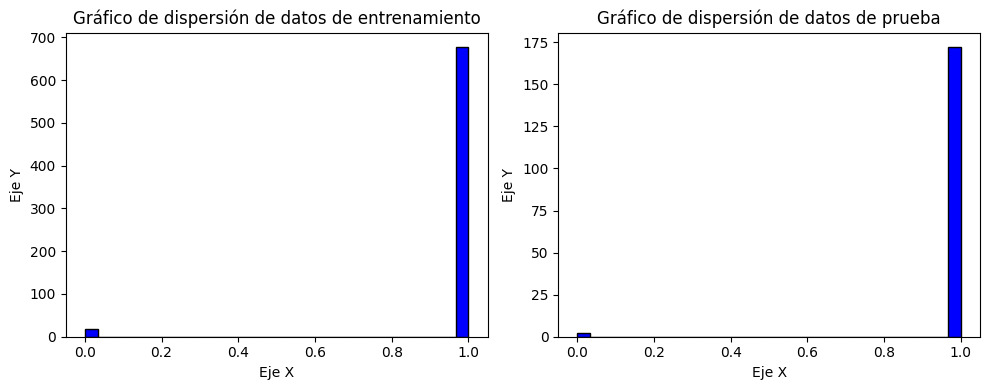

In [25]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 fila, 2 columnas

# Graficar datos de entrenamiento
axes[0].hist(y_train, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Gráfico de dispersión de datos de entrenamiento')
axes[0].set_xlabel('Eje X')
axes[0].set_ylabel('Eje Y')

# Graficar datos de prueba
axes[1].hist(y_test, bins=30, color='blue', edgecolor='black')
axes[1].set_title('Gráfico de dispersión de datos de prueba')
axes[1].set_xlabel('Eje X')
axes[1].set_ylabel('Eje Y')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [26]:
# Contar la cantidad de veces que se repiten los valores únicos
conteo_valores = y_train.value_counts()

# Mostrar el resultado
print(conteo_valores)

# Contar la cantidad de veces que se repiten los valores únicos
conteo_valores = y_test.value_counts()

# Mostrar el resultado
print(conteo_valores)

Dangerous
1            677
0             18
dtype: int64
Dangerous
1            172
0              2
dtype: int64


## Prueba 2: Split de la data utilizando `stratify` para distribución homogenea de la variable objetivo.

In [27]:
#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=le_Dangerous.classes_))

Accuracy: 0.9942528735632183

Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.75      0.86         4
         Yes       0.99      1.00      1.00       170

    accuracy                           0.99       174
   macro avg       1.00      0.88      0.93       174
weighted avg       0.99      0.99      0.99       174



El informe de clasificación proporciona métricas detalladas sobre el rendimiento de un modelo de clasificación en diferentes clases. Aquí hay una interpretación de cada métrica:

**Precision (Precisión):**

  - Precision para la clase 'No' (No): 1.00 (100%)

    Esto significa que, de todas las instancias que el modelo predijo como 'No', el 100% eran realmente 'No'.

  - Precision para la clase 'Yes' (Sí): 0.99 (99%)
    
    Esto significa que, de todas las instancias que el modelo predijo como 'Yes', el 99% eran realmente 'Yes'.

**Recall (Recuperación o Sensibilidad):**

  - Recall para la clase 'No' (No): 0.75 (75%)
    
    Esto significa que el modelo identificó correctamente el 75% de todas las instancias reales 'No'.
  - Recall para la clase 'Yes' (Sí): 1.00 (100%)
    
    Esto significa que el modelo identificó correctamente el 100% de todas las instancias reales 'Yes'.

**F1-Score (Puntuación F1):**

  - F1-Score para la clase 'No' (No): 0.86

    Es una medida de precisión y recall, donde 1.0 es la mejor puntuación posible.

  - F1-Score para la clase 'Yes' (Sí): 1.00
  
    Indica un equilibrio entre precision y recall.

**Support (Soporte):**

Es el número real de ocurrencias de las clases en los datos de prueba.

- Soporte para la clase 'No': 4

- Soporte para la clase 'Yes': 170

**Accuracy (Exactitud):**

La exactitud general del modelo en todas las clases.

Accuracy: 0.99 (99%)

El modelo clasificó correctamente el 99% de todas las instancias.

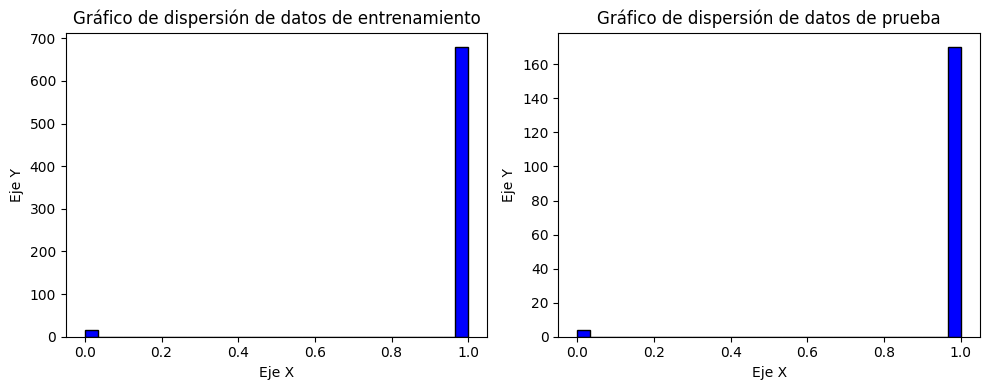

In [28]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 fila, 2 columnas

# Graficar datos de entrenamiento
axes[0].hist(y_train, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Gráfico de dispersión de datos de entrenamiento')
axes[0].set_xlabel('Eje X')
axes[0].set_ylabel('Eje Y')

# Graficar datos de prueba
axes[1].hist(y_test, bins=30, color='blue', edgecolor='black')
axes[1].set_title('Gráfico de dispersión de datos de prueba')
axes[1].set_xlabel('Eje X')
axes[1].set_ylabel('Eje Y')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [29]:
# Contar la cantidad de veces que se repiten los valores únicos
conteo_valores = y_train.value_counts()

# Mostrar el resultado
print(conteo_valores)

# Contar la cantidad de veces que se repiten los valores únicos
conteo_valores = y_test.value_counts()

# Mostrar el resultado
print(conteo_valores)

Dangerous
1            679
0             16
dtype: int64
Dangerous
1            170
0              4
dtype: int64


## Parte 3: Uso de `xgboost.DMatrix`

In [30]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [31]:
df = pd.read_csv('/content/clase_2_explicacion-regresion-logistica_multivariable.csv')

Eliminar valores vacíos.

In [32]:
df.dropna(inplace=True)

In [33]:
# Extract text features
cats = df.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
    df[col] = df[col].astype('category')

In [34]:
# df["Dangerous"] = df["Dangerous"].astype('category')
label_Dangerous = {'Yes': 1, 'No': 0}
decode_Dangerous = { 0: 'No', 1: 'Yes',}
df["Dangerous"] = df['Dangerous'].map(label_Dangerous)
df["Dangerous"] = df["Dangerous"].astype('int64')

[0]	validation-auc:0.96912	train-auc:0.89967
[1]	validation-auc:0.95368	train-auc:0.90722
[2]	validation-auc:0.96838	train-auc:0.90961
[3]	validation-auc:0.96618	train-auc:0.90938
[4]	validation-auc:0.97059	train-auc:0.91094
[5]	validation-auc:0.97647	train-auc:0.91495
[6]	validation-auc:0.97353	train-auc:0.91504
[7]	validation-auc:0.97206	train-auc:0.91661
[8]	validation-auc:0.98382	train-auc:0.91900
[9]	validation-auc:0.98529	train-auc:0.91955
[10]	validation-auc:0.98529	train-auc:0.92038
[11]	validation-auc:0.98382	train-auc:0.92047
[12]	validation-auc:0.98235	train-auc:0.92038
[13]	validation-auc:0.98088	train-auc:0.92084
[14]	validation-auc:0.97941	train-auc:0.92084
[15]	validation-auc:0.98088	train-auc:0.92158
[16]	validation-auc:0.98088	train-auc:0.92176
[17]	validation-auc:0.98088	train-auc:0.92231
[18]	validation-auc:0.98235	train-auc:0.92250
[19]	validation-auc:0.98235	train-auc:0.92250
[20]	validation-auc:0.98382	train-auc:0.92259
[21]	validation-auc:0.98382	train-auc:0.9225

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:36:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "enable_categorical", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


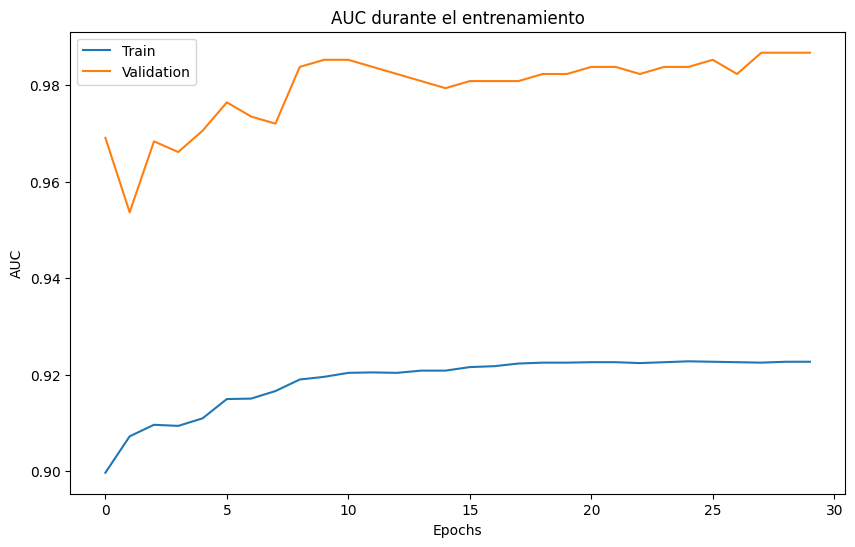

Accuracy: 0.9827586206896551

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.98      1.00      0.99       170

    accuracy                           0.98       174
   macro avg       0.99      0.62      0.70       174
weighted avg       0.98      0.98      0.98       174



In [35]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create regression matrices
dtrain_reg = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

# Definir los parámetros del modelo
params = {
    'objective': 'binary:logistic',  # Utilizar la función de pérdida para regresión lineal
    'eval_metric': ['auc'],  # Métrica de evaluación: Root Mean Squared Error (RMSE)
    'booster': 'gbtree',  # Usar un booster lineal para regresión lineal
    'enable_categorical': True,  # Habilitar compatibilidad con datos categóricos
    'learning_rate': 0.05,
    'n_estimators': 10, # Cantidad de gradiend boosted trees
}

# Entrenar el modelo
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
evals_result = {}  # Almacenar los resultados de la evaluación

modelo = xgb.train(params, dtrain_reg, num_boost_round=100,
                   evals=evals,
                   evals_result=evals_result,
                   verbose_eval=1,
                   early_stopping_rounds=5)

# Extraer las métricas AUC del conjunto de validación y prueba
auc_train = evals_result['train']['auc']
auc_val = evals_result['validation']['auc']

# Plotear las métricas AUC durante el entrenamiento
epochs = len(auc_train)
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, auc_train, label='Train')
plt.plot(x_axis, auc_val, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('AUC durante el entrenamiento')
plt.legend()
plt.show()

# Hacer predicciones en el conjunto de prueba
predictions = modelo.predict(dtest_reg)

# Aplicar umbral y calcular la precisión
umbral = 0.5
predictions = np.where(predictions > umbral, 1, 0)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


# Práctica calificada

A partir del dataset ubicado en `/content/clase_2_explicacion-regresion-logistica_multivariable.csv` realizar la predicción utilizando los modelos de aprendizaje supervisado:

- XGBoost.
- Árbol de decisión.

Para ello, deberá realizar:

1. Análisis exploratorio de datos (EDA) incluyendo los gráficos necesarios para explicar las variables.
  
  Tienes libertad de usar la librería que más gustes (Matplotlib, Seaborn, Plotly).

2. Utilizar los modelos de aprendizaje supervisado vistos en clase.

  Crear al menos 2 diferentes modelos de regresión. Se recomienda utilizar diferentes hiperparámetros.

3. Utilizar SHAP para explicar las variables que impactan más en el modelo.

    Responder las preguntas que se encuentran al final del ejercicio.

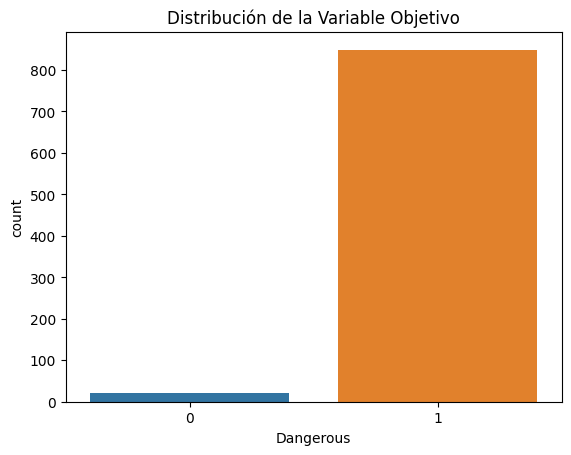

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


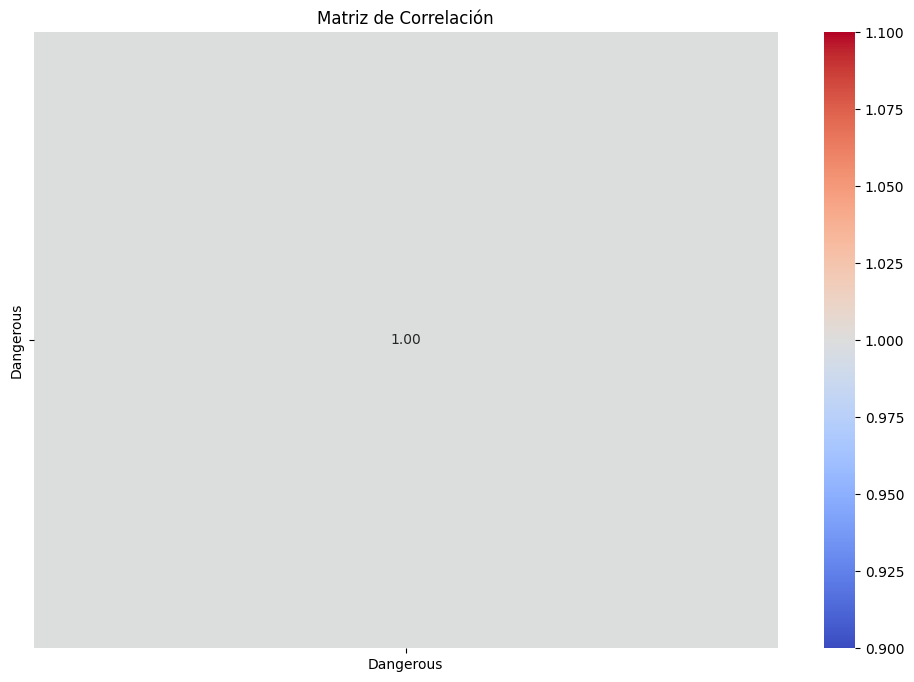

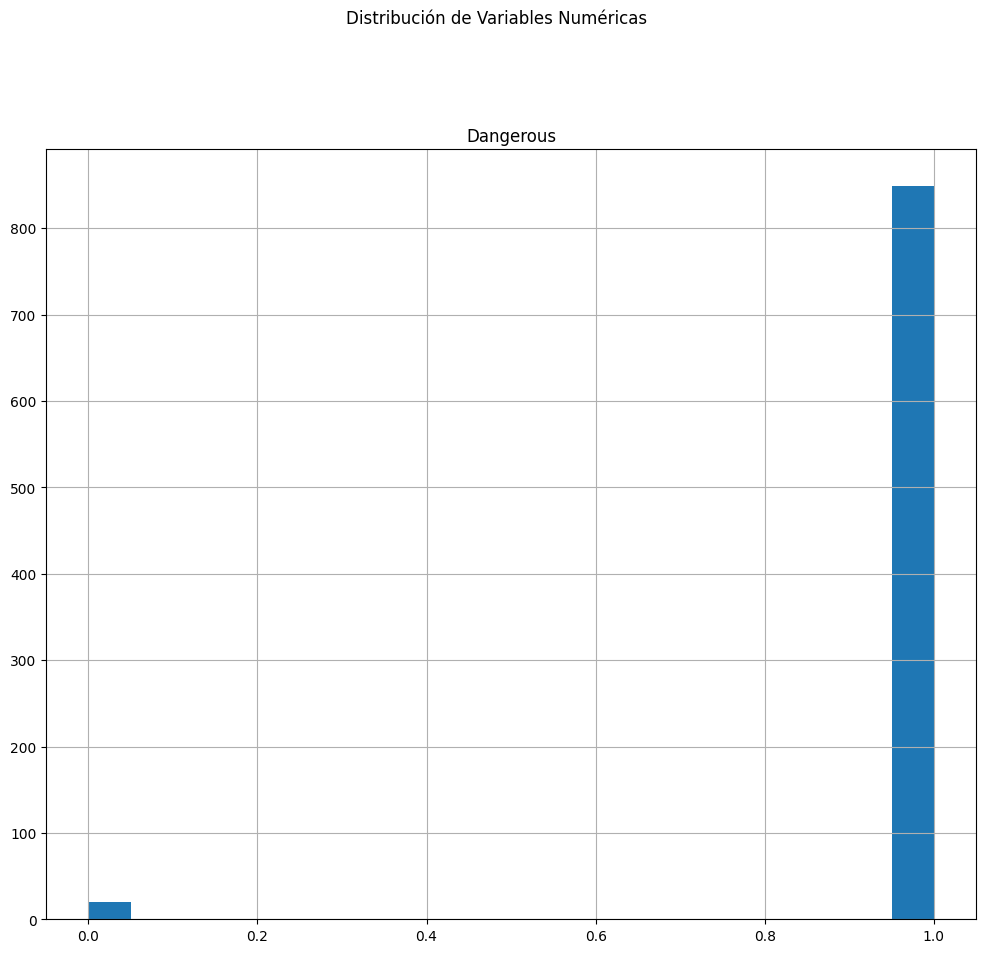

In [48]:
# Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# EDA
# Visualización de la distribución de la variable objetivo
sns.countplot(x='Dangerous', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.show()

# Visualización de la relación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Visualización de la distribución de las variables numéricas
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribución de Variables Numéricas', y=1.02)
plt.show()

XGBoost Accuracy: 0.9942528735632183


[01:41:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


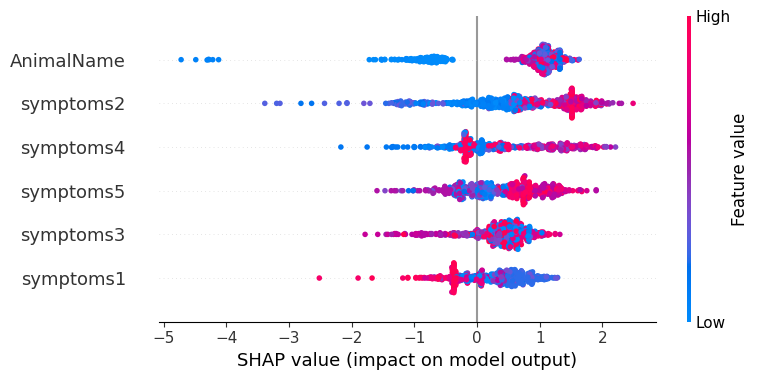

In [70]:
# Modelo 1: XGBoost

# Split de la data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear XGBoost classifier
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    enable_categorical=True,
    random_state=42
)

# Entrenar el modelo en los datos de entrenamiento
model_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_xgb = model_xgb.predict(X_test)

# Calcular la exactitud
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Crear un objeto TreeExplainer para el modelo XGBoost
explainer_xgboost = shap.TreeExplainer(model_xgb)

# Calcular los valores SHAP para un conjunto de datos (puedes usar datos de entrenamiento o prueba)
shap_values_xgboost = explainer_xgboost.shap_values(X_train)

# Mostrar un resumen del impacto de las características en las predicciones
shap.summary_plot(shap_values_xgboost, X_train)


Decision Tree Accuracy: 0.9942528735632183


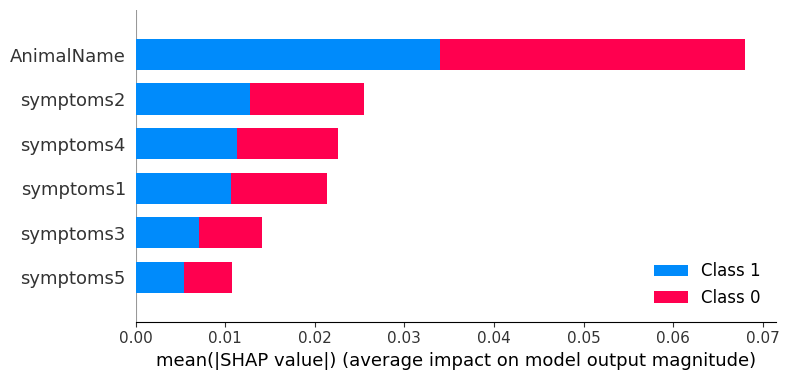

In [71]:
# Modelo 2: Decision tree

from sklearn.tree import DecisionTreeClassifier

# Crear Decision Tree classifier
model_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
model_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_tree = model_tree.predict(X_test)

# Calcular la exactitud
accuracy_tree = accuracy_score(y_test, predictions_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# Crear un objeto TreeExplainer para el modelo de árbol de decisión
explainer_decision_tree = shap.TreeExplainer(model_tree)

# Calcular los valores SHAP para un conjunto de datos
shap_values_decision_tree = explainer_decision_tree.shap_values(X_train)

# Mostrar un resumen del impacto de las características en las predicciones
shap.summary_plot(shap_values_decision_tree, X_train)


Interpretando los resultados con SHAP

In [52]:
!pip install shap

In [53]:
import shap

[01:18:07] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


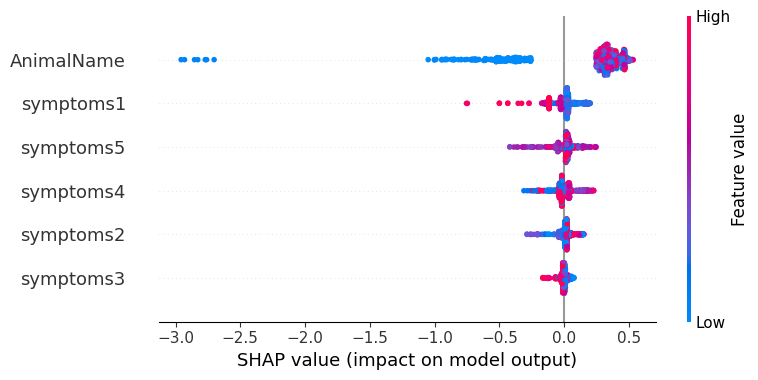

In [65]:
# Crear un objeto TreeExplainer
explainer = shap.TreeExplainer(modelo)

# Calcular los valores SHAP para un conjunto de datos (puedes usar datos de entrenamiento o prueba)
shap_values = explainer.shap_values(X_train)

# Mostrar un resumen del impacto de las características en las predicciones
shap.summary_plot(shap_values, X_train)

## **Responde aquí las siguientes preguntas**

**Pregunta 1:**

¿Cómo interpretas los resultados?


In [86]:
# Celda para colocar tu respuesta.

# Coloca tu respuesta debajo de esta línea.

print('Los modelos de clasificación, especialmente XGBoost, muestran una alta precisión en la predicción de la variable objetivo "Dangerous".\nSe obtuvieron valores de precisión cercanos al 99% en el conjunto de prueba para ambas clases ("Yes" y "No"). El análisis de SHAP revela\nque las variables tienen mayor impacto positivo pues su ubican con alta magnitud en el lado derecho de la gráfica.')


Los modelos de clasificación, especialmente XGBoost, muestran una alta precisión en la predicción de la variable objetivo "Dangerous".
Se obtuvieron valores de precisión cercanos al 99% en el conjunto de prueba para ambas clases ("Yes" y "No"). El análisis de SHAP revela
que las variables tienen mayor impacto positivo pues su ubican con alta magnitud en el lado derecho de la gráfica.



**Pregunta 2:**

¿Qué variables están impactando más en el modelo de clasificación multivariable?

Comparar todos los modelos desarrollados.


In [85]:
# Celda para colocar tu respuesta.

# Coloca tu respuesta debajo de esta línea.

print('Al comparar los dos modelos, observamos similitudes y diferencias en las variables más impactantes. Los modelos parecen dar importancia al nombre del animal pues se\nencuentra dispersa entre datos de impacto positivos y negativos en el modelo, pero estos tienen mayor impacto en el lado positivo del resumen.\nAsimismo, la contribución de los otros sintomas tambien tienen un papel destacado en el modelo XGBoost en comparación con el árbol de decisión.\nEn resumen, la interpretación de las variables más impactantes varía entre los modelos, y esta información puede ser crucial para\ncomprender cómo cada algoritmo considera diferentes aspectos de los datos en el proceso de toma de decisiones.')

Al comparar los dos modelos, observamos similitudes y diferencias en las variables más impactantes. Los modelos parecen dar importancia al nombre del animal pues se
encuentra dispersa entre datos de impacto positivos y negativos en el modelo, pero estos tienen mayor impacto en el lado positivo del resumen.
Asimismo, la contribución de los otros sintomas tambien tienen un papel destacado en el modelo XGBoost en comparación con el árbol de decisión.
En resumen, la interpretación de las variables más impactantes varía entre los modelos, y esta información puede ser crucial para
comprender cómo cada algoritmo considera diferentes aspectos de los datos en el proceso de toma de decisiones.



**Pregunta 3:**

¿Qué recomendaciones harías para mejorar los modelos anteriores? Y ¿Qué recomendaciones harías para mejorar el modelo que creaste?


```
Por ejemplo, el dataset contiene datos duplicados. ¿Qué harías con los datos duplicados?
¿Los eliminarías, no los eliminarías?, ¿aumentarías la candidad de granularidad o detalle para cada observación?
```





In [87]:
# Celda para colocar tu respuesta.

# Coloca tu respuesta debajo de esta línea.

print('Eliminar datos duplicados, ajustar parametros para mejorar el rendimiento del modelo, interpretacion continua con herramientas\nadicionales para comprender mejor la relacion entre variables y predicciones.\nFinalmente, quiza crear nuevas caracteristicas a partir de las existentes para capturar patrones mas complejos.')


Eliminar datos duplicados, ajustar parametros para mejorar el rendimiento del modelo, interpretacion continua con herramientas
adicionales para comprender mejor la relacion entre variables y predicciones.
Finalmente, quiza crear nuevas caracteristicas a partir de las existentes para capturar patrones mas complejos.


## Puntos extra (Despliegue en Hugging Face)

Para acceder a los puntos extra de la práctica calificada, deberás desplegar el modelo que has creado en HuggingFace.com.

Recuerda:

1. Guardar el modelo en formato JSON.

2. Utilizar la librería Gradio para crear la interfaz de usuario para interactuar con el modelo y realizar las predicciones.


In [44]:
# Ejemplo de cómo almacenar el modelo en un archivo JSON

# nombre_de_tu_modelo.save_model('nombre_de_tu_modelo.json')


In [89]:
config_data = {
    "modelo": "tarea2",
    "hiperparametros": {
        "learning_rate": 0.1,
        "max_depth": 5,
        "n_estimators": 100
    },
    "otros_parametros": "valor"
}


In [90]:
import json

# Nombre del archivo JSON
json_file_path = 'config.json'

# Convertir el diccionario a una cadena JSON y guardarlo en el archivo
with open(json_file_path, 'w') as json_file:
    json.dump(config_data, json_file, indent=4)
